In [1]:
import ptc_twiss.madx_configuration as configuration
import ptc_twiss.matrix_indexes as indexes
import ptc_twiss.particles_trajectory_generator as transporter
import visualization.visualize as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/eos/user/r/rmucha/SWAN_projects"

In [4]:
folder_name = "2016"
script_file_name = "ptc_twiss_script.madx"
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = configuration.TwissConfiguration(path_to_script, s)

In [5]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.15

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 31

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [6]:
title_sufix = "2016, ptc_twiss"

In [8]:
segments = transporter.generate_from_range(madx_configuration=twiss_configuration, bunch_configuration=bunch_configuration)

In [9]:
matrix = segments["end"]

AttributeError: 'Line2D' object has no property 's'

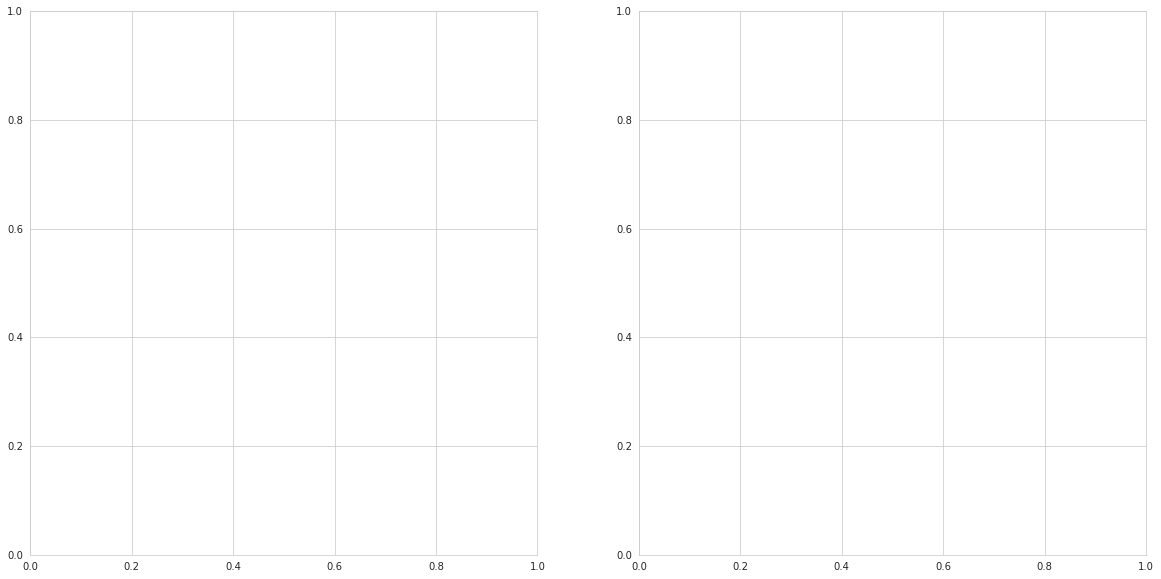

In [14]:
f, axes = plt.subplots(1, 2)

fig = plt.gcf()
fig.set_size_inches(20,10)

mapping = indexes.ptc_twiss

plotter.plot_from_one_matrix("pt", "D y", matrix, mapping, axes, 0, title_sufix=title_sufix)
plotter.plot_from_one_matrix("pt", "D x", matrix, mapping, axes, 1, title_sufix=title_sufix)

array([[ 2.19551000e+02,  5.50911058e-02,  1.67734633e-03,
        -1.87396088e-04,  8.18210147e-06,  3.48739296e+04,
         7.03171597e+04,  7.47645722e-01,  7.46856556e-01,
        -1.68810373e+02, -2.39685713e+02, -2.56392499e-01,
        -1.18202049e-03, -3.00000000e-01],
       [ 2.19551000e+02,  5.25622062e-02,  1.66541758e-03,
        -1.76131131e-04,  8.37530225e-06,  3.21599450e+04,
         6.35456464e+04,  7.47509031e-01,  7.46783249e-01,
        -1.59821722e+02, -2.24639199e+02, -2.49426188e-01,
        -1.20293960e-03, -2.90000000e-01],
       [ 2.19551000e+02,  5.01018172e-02,  1.65330236e-03,
        -1.65422145e-04,  8.55765054e-06,  2.95547124e+04,
         5.72307626e+04,  7.47367021e-01,  7.46703486e-01,
        -1.51079880e+02, -2.10220128e+02, -2.42689279e-01,
        -1.21940927e-03, -2.80000000e-01],
       [ 2.19551000e+02,  4.77076785e-02,  1.64104242e-03,
        -1.55238022e-04,  8.72990513e-06,  2.70641518e+04,
         5.13585889e+04,  7.47218623e-01,  7.